## Healthcare Risk Classifier (Diabetes Prediction)

# 2. Objectives of the Project



Understand patterns related to diabetes occurrence

Perform basic data preprocessing

Conduct minimal but meaningful Exploratory Data Analysis (EDA)

Build classification-based machine learning models

Evaluate model performance using classification metrics

Identify key medical features influencing diabetes prediction

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load Dataset

In [ ]:
df = pd.read_excel("/content/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.head())
print(df.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

 Data Cleaning
Replace 0 values in medical columns

In [ ]:
columns_to_fix = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in columns_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-3920035436.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


checking missing value

In [ ]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Define Features & Target

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
#Standard Scaller
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Encoding target variable(outCome)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
le = LabelEncoder()
df['Outcome_encoded'] = le.fit_transform(df['Outcome'])

print(df[['Outcome', 'Outcome_encoded']].head())


   Outcome  Outcome_encoded
0        1                1
1        0                0
2        1                1
3        0                0
4        1                1


Train Model (Logistic Regression)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np


dt_model = DecisionTreeClassifier(
    criterion='gini',      # or 'entropy'
    max_depth=4,           # controls overfitting
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Random Forest Classiefier

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 Prediction & Accuracy

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# Prediction & Accuracy

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# Data Visualization (Graphs)


# Bar Chart – Diabetes Outcome Distribution

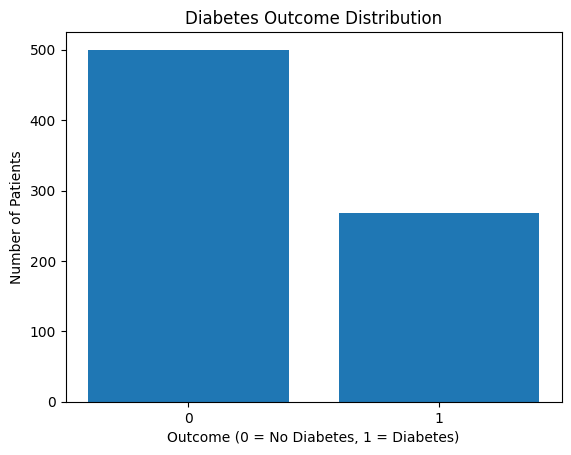

In [ ]:
# Count values of Outcome
outcome_counts = df['Outcome'].value_counts()

# Create Bar Chart
plt.figure()
plt.bar(outcome_counts.index, outcome_counts.values)

plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Number of Patients")

plt.xticks([0,1])
plt.show()


 Outcome Count Plot

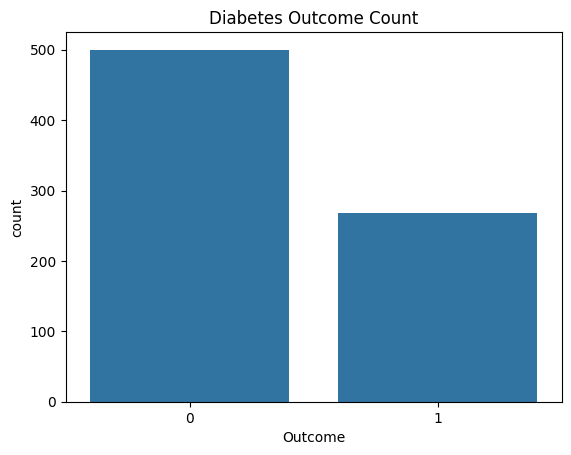

In [ ]:
plt.figure()
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Count")
plt.show()


Histogram
 Glucose Distribution

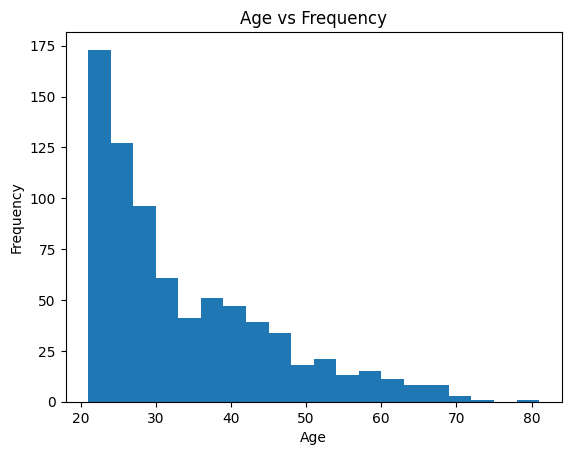

In [ ]:
plt.figure()
plt.hist(df['Age'], bins=20)
plt.title("Age vs Frequency")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## Boxplot
BMI Vs Outcome

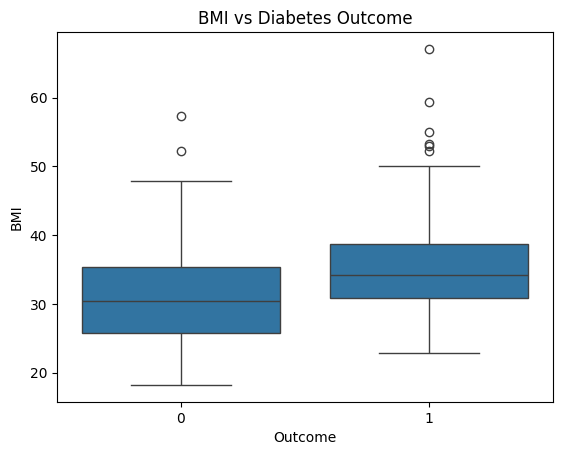

In [ ]:
plt.figure()
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()


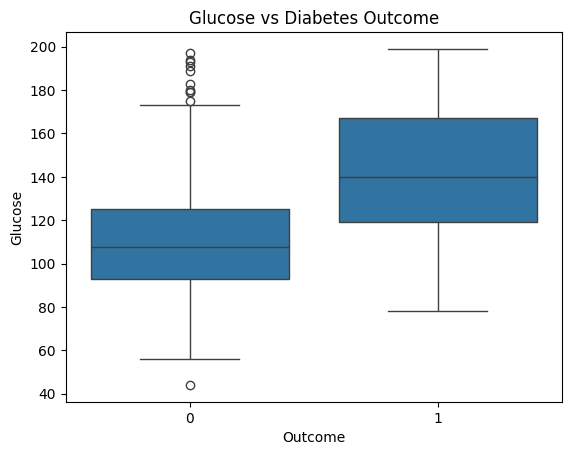

In [ ]:
plt.figure()
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs Diabetes Outcome")
plt.show()


# Correlation Heatmap

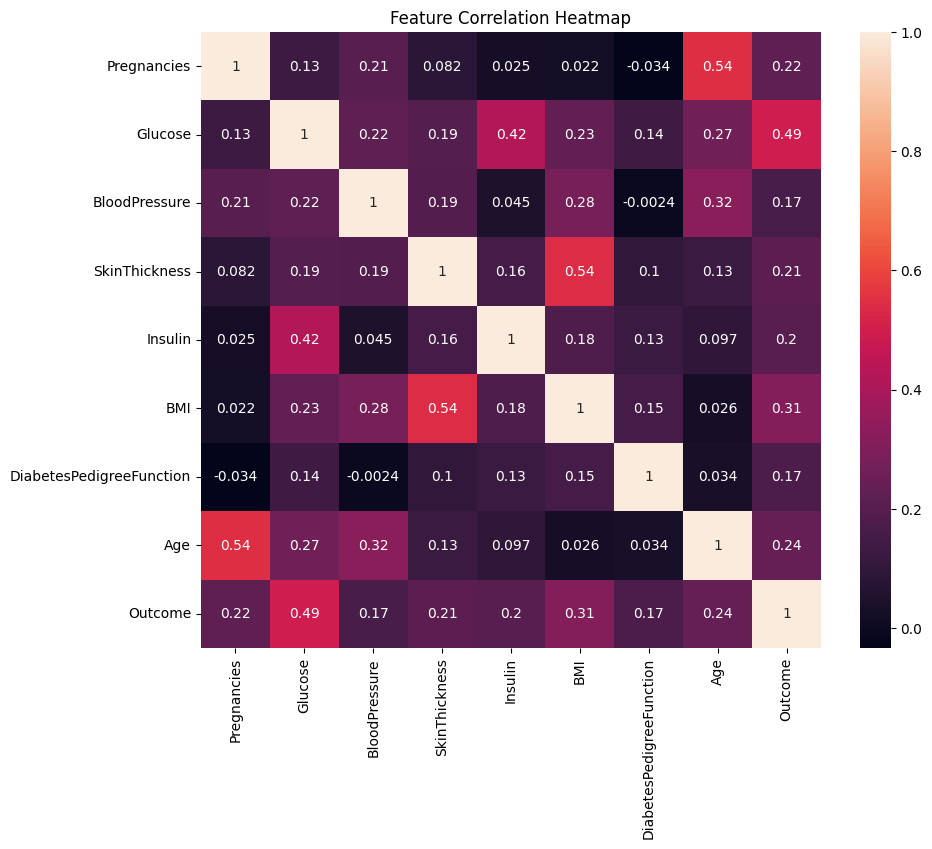

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


# Confusion Matrix Graph

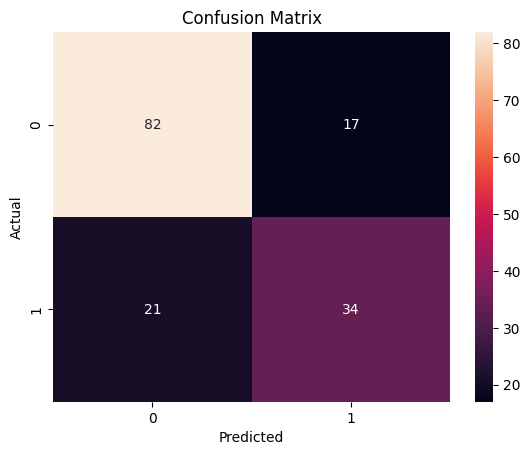

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


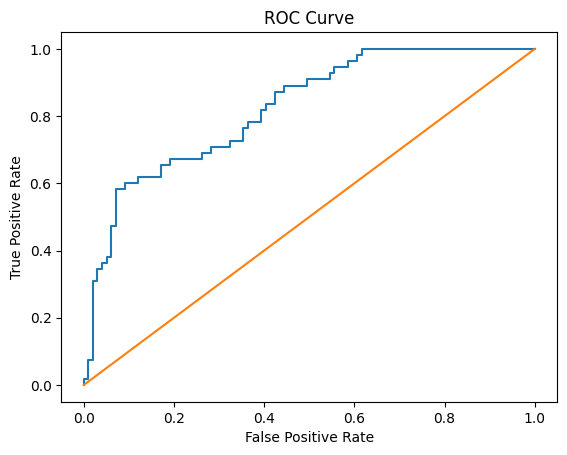

AUC Score: 0.82277318640955


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("AUC Score:", roc_auc)


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                    Feature  Importance
1                   Glucose    0.263453
5                       BMI    0.164118
7                       Age    0.134927
6  DiabetesPedigreeFunction    0.121819
4                   Insulin    0.089248
2             BloodPressure    0.084062
3             SkinThickness    0.072432
0               Pregnancies    0.069942


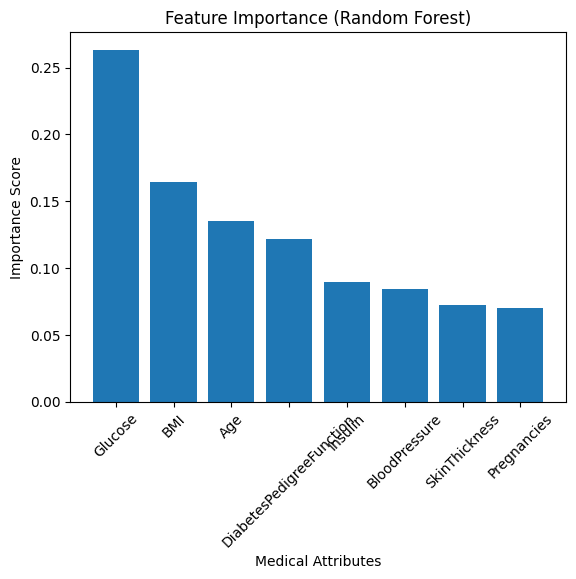

In [ ]:
plt.figure()
plt.bar(feature_importance_df['Feature'],
        feature_importance_df['Importance'])

plt.xticks(rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Medical Attributes")
plt.ylabel("Importance Score")
plt.show()
